## Homework #2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

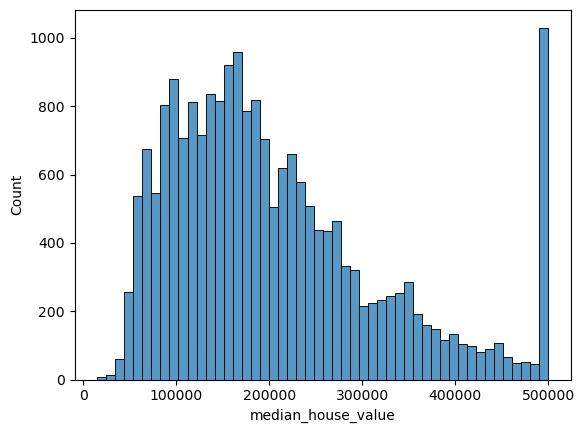

In [2]:
ca_housing = pd.read_csv('C:/Users/davej/.jupyter/mlzoomcamp/02-regression/ca_housing_prices.csv')
sns.histplot(ca_housing['median_house_value'], bins=50)
ca_housing = ca_housing[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population',
                         'households','median_income','median_house_value']]

###  Question 1

In [3]:
ca_housing.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

###  Question 2

In [4]:
ca_housing['population'].median()

1166.0

###  Question 3

In [5]:
#setting up the validation framework: train 60%, validate 20%, test 20%
n = len(ca_housing)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [6]:
#before assigning dataframe observations to each subset, shuffle observations
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [7]:
#assign shuffled dataframe observations to each data subset
chp_train = ca_housing.iloc[idx[:n_train]]
chp_val = ca_housing.iloc[idx[n_train:(n_train + n_val)]]
chp_test = ca_housing.iloc[idx[(n_train + n_val):]]

In [8]:
#reset indices for each data subset
chp_train = chp_train.reset_index(drop=True)
chp_val = chp_val.reset_index(drop=True)
chp_test = chp_test.reset_index(drop=True)

In [9]:
#apply log transformation to y vectors
y_train = np.log1p(chp_train['median_house_value'].values)
y_val = np.log1p(chp_val['median_house_value'].values)
y_test = np.log1p(chp_test['median_house_value'].values)

In [10]:
#delete median_house_value vars from data subsets so that we don't actually use it as a feature to predict price
del chp_train['median_house_value']
del chp_val['median_house_value']
del chp_test['median_house_value']

In [11]:
#set up data preparation function
base = list(chp_train.columns)
def prepare_X(df,nan):
    df = df.copy()
    cp_num = df[base]
    cp_num = cp_num.fillna(nan)
    X = cp_num.values
    return X

In [12]:
#set up linear regression training function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [13]:
#set up rmse calculation function
def rmse(y,y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [14]:
#calculate RMSE with 0 as NAs
X_train = prepare_X(chp_train,0)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(chp_val,0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
rmse_0 = round(score, 2)
rmse_0

0.33

In [15]:
#calculate RMSE with mean of total_bedrooms as NAs
X_train = prepare_X(chp_train,chp_train['total_bedrooms'].mean())
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(chp_val,chp_train['total_bedrooms'].mean())
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
rmse_mean = round(score, 2)
rmse_mean

0.33

###  Question 4

In [16]:
#set up regularized linear regression training function
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [17]:
#calculate RMSE based on different r values
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(chp_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(chp_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0,  round(score, 2))

0.0 -11.686975241911805 0.33
1e-06 -11.686959176106466 0.33
0.0001 -11.685368865381463 0.33
0.001 -11.670931318209552 0.33
0.01 -11.528493585718884 0.33
0.1 -10.274500282155724 0.33
1 -4.920480897785023 0.33
5 -1.482095745620537 0.34
10 -0.7899311832204973 0.34


###  Question 5

In [18]:
#create list of RMSE scores based on different seed values
rmse_scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    idx

    #assign shuffled dataframe observations to each subset
    chp_train = ca_housing.iloc[idx[:n_train]]
    chp_val = ca_housing.iloc[idx[n_train:(n_train + n_val)]]
    chp_test = ca_housing.iloc[idx[(n_train + n_val):]]

    #reset indices for each subset
    chp_train = chp_train.reset_index(drop=True)
    chp_val = chp_val.reset_index(drop=True)
    chp_test = chp_test.reset_index(drop=True)

    #apply log transformation to y vars
    y_train = np.log1p(chp_train['median_house_value'].values)
    y_val = np.log1p(chp_val['median_house_value'].values)
    y_test = np.log1p(chp_test['median_house_value'].values)

    #delete median_house_value vars from subsets so that we don't actually use it as a feature to predict price
    del chp_train['median_house_value']
    del chp_val['median_house_value']
    del chp_test['median_house_value']
    
    X_train = prepare_X(chp_train,0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(chp_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
rmse_scores

[0.33884304805295884,
 0.3362387255955875,
 0.3320912318844027,
 0.34051536090355167,
 0.3389024066572691,
 0.3434866725719515,
 0.3451980953098988,
 0.3395989927404383,
 0.3466230873192809,
 0.3365926124192128]

In [19]:
#calculate standard deviation of RMSE scores
std = round(np.std(np.array(rmse_scores)), 3)
std

0.004

###  Question 6

In [20]:
#use seed 9, train model on entire training + validation dataset, and then validate using test dataset
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

chp_train = ca_housing.iloc[idx[:n_train]]
chp_val = ca_housing.iloc[idx[n_train:(n_train + n_val)]]
chp_test = ca_housing.iloc[idx[(n_train + n_val):]]

y_train = np.log1p(chp_train['median_house_value'].values)
y_val = np.log1p(chp_val['median_house_value'].values)
y_test = np.log1p(chp_test['median_house_value'].values)

del chp_train['median_house_value']
del chp_val['median_house_value']
del chp_test['median_house_value']

chp_full_train = pd.concat([chp_train, chp_val])
chp_full_train = chp_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])
X_full_train = prepare_X(chp_full_train,0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(chp_test,0)
y_pred = w0 + X_test.dot(w)
round(rmse(y_test, y_pred), 3)

0.345